### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Image enhancement algorithms in the Fourier domain**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

The Fourier transform is a mathematical formula that transforms a signal sampled in time or space to the same signal sampled in temporal or spatial frequency. In signal processing, the Fourier transform can reveal important characteristics of a signal, namely, its frequency components. The Fourier transform is widely used in many fields, including physics, engineering, and computer science.

In this project, we will explore the Fourier transform and its applications in image processing. We will implement several image enhancement algorithms in the Fourier domain, including low-pass filtering and high-pass filtering.

### Fourier Transform
The Fourier transform is a mathematical operation that transforms a signal from the time or spatial domain to the frequency domain. The Fourier transform of a signal \( x \) is defined as:

\begin{equation}
X(f) = \sum_{n=0}^{N-1} x(n) e^{-j2\pi fn/N}
\end{equation}

where \( X(f) \) is the Fourier transform of \( x \) at frequency \( f \), \( x(n) \) is the \( n \)-th sample of \( x \), and \( N \) is the number of samples in \( x \). The Fourier transform can be computed efficiently using the Fast Fourier Transform (FFT) algorithm.

Essentially, the Fourier transform decomposes a signal into its frequency components. The magnitude of the Fourier transform represents the amplitude of each frequency component, while the phase of the Fourier transform represents the phase shift of each frequency component.

<img src="https://www.projectrhea.org/rhea/images/0/01/Cameraman.jpg" alt="Image Alt Text" width="500"/>

### Image Enhancement in the Fourier Domain
The Fourier transform can be applied to images to enhance their quality. For example, low-pass filtering can be used to remove high-frequency noise from an image, while high-pass filtering can be used to enhance the edges of an image.

### Low-Pass Filtering
Low-pass filtering is a technique used to remove high-frequency noise from an image. The idea is to suppress the high-frequency components of the image while preserving the low-frequency components. This can be achieved by multiplying the Fourier transform of the image by a low-pass filter in the frequency domain.

### High-Pass Filtering
High-pass filtering is a technique used to enhance the edges of an image. The idea is to suppress the low-frequency components of the image while preserving the high-frequency components. This can be achieved by multiplying the Fourier transform of the image by a high-pass filter in the frequency domain.


https://www.mathworks.com/help/matlab/math/fourier-transforms.html

https://biomedpharmajournal.org/vol7no2/image-sharpening-by-gaussian-and-butterworth-high-pass-filter/



### Importing libraries

In [16]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [17]:
# Loading images

fingerprint = cv2.imread("data/fingerprint.png")
fingerprint_image = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

In [18]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()


### 1. Application of image enhancement using Fourier transform with a low-pass filter.

One of the most effective methods for noise removal and image smoothins is **low pass filtering**. This allows low-frequency componnets to pass while eliminating high-frequency components associated with edges and fine details.

<img src="./data/Low_Pass_Example.png" width="250"/>


Based on the *Fourier Transform*, which demcomposes an image into its frequency components. With the principal low-pass general equation:

<img src="./data/Low_Pass_General_Equation.png" width="250"/>

Where:
- F(u,v) is the *Fourier Trnasform* 
- H(u,v) is the *transfer function*
- G(u,v) is the *filtered image*

#### Ideal Low-Pass Filter (ILPF)
The **ideal low-pass filter** keeps all frequencies within a radius \( D \) and **completely removes** frequencies higher than this threshold.

<img src="./data/ILPF.png" width="250"/>

Where:
- \( D(u,v) = \sqrt{(u - M/2)^2 + (v - N/2)^2} \)  
  is the **Euclidean distance** from the center of the frequency domain.  
  Here, \( M \) and \( N \) are the image dimensions.

- \( D_0 \) is the **cutoff frequency**, which determines the threshold for filtering.

#### Butterworth Low-Pass Filter (BLPF)

The **Butterworth filter** introduces a **smooth transition** between the allowed and attenuated frequencies, reducing ringing effects.

<img src="./data/BLPF.png" width="250"/>

Where:

- \( D(u,v) = \sqrt{(u - M/2)^2 + (v - N/2)^2} \)  
  is the **distance from the center of the frequency domain**.

- \( D_0 \) is the **cutoff frequency** that controls how much of the high frequencies are attenuated.

- \( n \) is the **order of the Butterworth filter**, which controls the smoothness of the transition.  
  - If \( n = 1 \), the transition is smooth.  
  - As \( n \) increases, the filter behaves more like an **ideal filter**.  

#### Gaussian Low-Pass Filter (GLPF)
The **Gaussian low-pass filter** provides smooth attenuation based on a **Gaussian function**.

<img src="./data/GLPF.png" width="250"/>

Where:

- \( D(u,v) = \sqrt{(u - M/2)^2 + (v - N/2)^2} \)  
  represents the **distance from the center of the frequency domain**.

- \( D_0 \) is the **cutoff frequency**, determining how much of the high frequencies are removed.



In [19]:
def low_pass_filter(image, filter_type='none', D0=30, n=2):
    """
    Applies a low-pass filter to an image using Fourier transform.

    Parameters:
    image (numpy.ndarray): Input grayscale image.
    filter_type (str): Type of low-pass filter ('none', 'ideal', 'butterworth', 'gaussian').
    D0 (int): Cutoff frequency.
    n (int): Order of the Butterworth filter (only used if filter_type is 'butterworth').

    Returns:
    numpy.ndarray: Filtered image.
    """
    # Convert the image to grayscale if it is not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    
    # Apply Fourier transform
    dft = np.fft.fft2(image)    
    dft_shift = np.fft.fftshift(dft)

    # Check the filter type and return the fourier transformed image if 'none'
    if filter_type == 'none':
        return np.abs(dft_shift)
    
    # Create the low-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    
    if filter_type == 'ideal':
        for i in range(rows):
            for j in range(cols):
                if np.sqrt((i - crow)**2 + (j - ccol)**2) <= D0:
                    mask[i, j] = 1
    elif filter_type == 'butterworth':
        for i in range(rows):
            for j in range(cols):
                mask[i, j] = 1 / (1 + (np.sqrt((i - crow)**2 + (j - ccol)**2) / D0)**(2 * n))
    elif filter_type == 'gaussian':
        for i in range(rows):
            for j in range(cols):
                mask[i, j] = np.exp(-((i - crow)**2 + (j - ccol)**2) / (2 * (D0**2)))

    # Apply the filter
    dft_shift_filtered = dft_shift * mask
    
    # Inverse Fourier transform
    dft_shift_filtered = np.fft.ifftshift(dft_shift_filtered)
    img_back = np.fft.ifft2(dft_shift_filtered)
    img_back = np.abs(img_back)
    
    return img_back


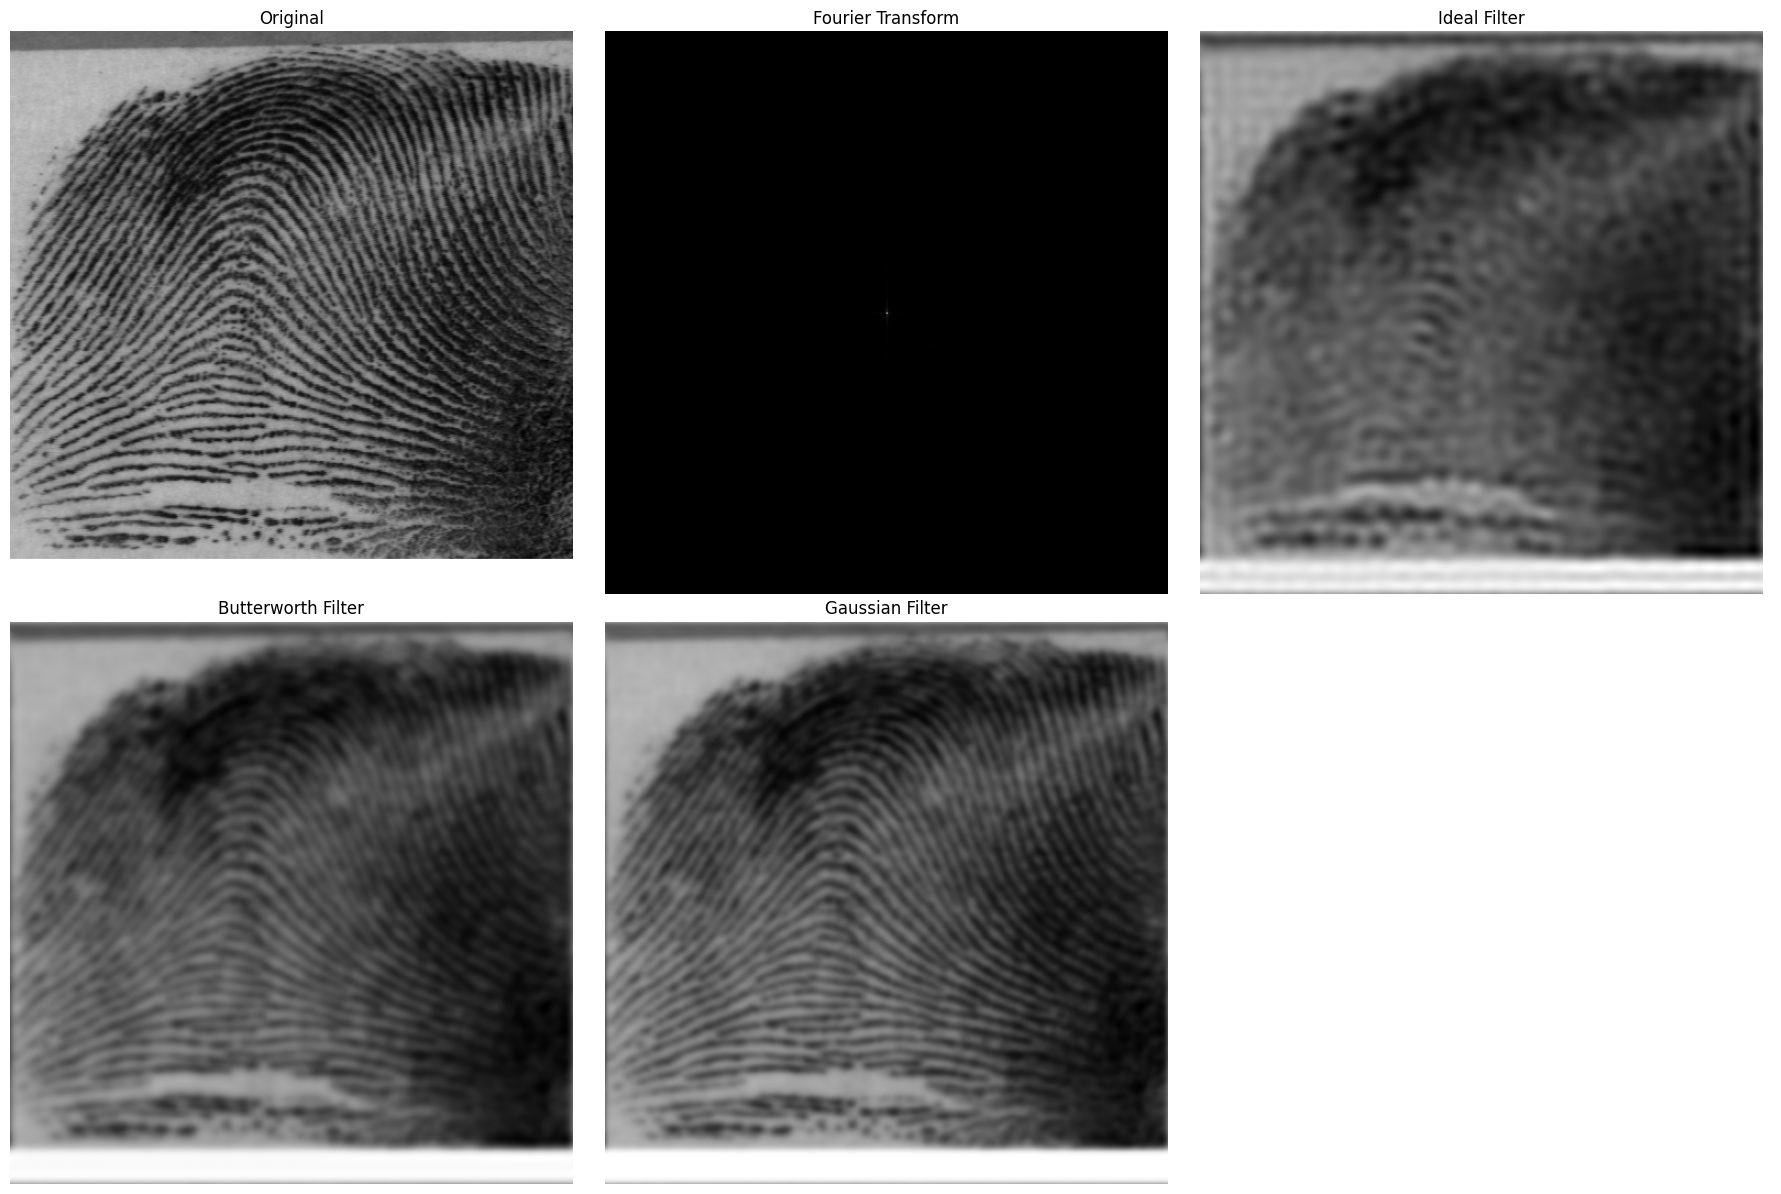

In [20]:
# Load the image
image = fingerprint_image.copy()

# Apply the filters
fourier_low_pass = low_pass_filter(image, filter_type='none')
ideal_filtered = low_pass_filter(image, filter_type='ideal', D0=30)
butterworth_filtered = low_pass_filter(image, filter_type='butterworth', D0=30, n=2)
gaussian_filtered = low_pass_filter(image, filter_type='gaussian', D0=30)


# Display the images
images = [image, fourier_low_pass, ideal_filtered, butterworth_filtered, gaussian_filtered]
labels = ["Original", "Fourier Transform", "Ideal Filter", "Butterworth Filter", "Gaussian Filter"]
plot_images(images, labels, nrows=2, ncols=3, figsize=(18, 12))

### 2. Application of image enhancement using Fourier transform with a high-pass filter.

Image sharpening in the frequency domain is achieved using high-pass filtering, which attenuates low-frequency components while preserving high-frequency details. 

In the frequency domain, high-pass filtering can be performed by:

- Applying a Fourier Transform (FT) to convert the image into the frequency domain.
- Multiplying the transformed image by a high-pass filter mask.
- Applying the Inverse Fourier Transform (IFT) to reconstruct the processed image.

High-pass spatial kernels generated using Ideal, Gaussian and Butterworth high-pass filters. These kernels are constructed following Equation (4-122)

<img src="https://i.imgur.com/PR1MENj.png" alt="Image Alt Text" width="500"/>


In [21]:
# Function to apply high-pass filter
def high_pass_filter(image, filter_type='none', D0=30, n=2):
    """
    Applies a high-pass filter to an image using Fourier transform.

    Parameters:
    image (numpy.ndarray): Input grayscale image.
    filter_type (str): Type of high-pass filter ('none', 'ideal', 'butterworth', 'gaussian').
    D0 (int): Cutoff frequency.
    n (int): Order of the Butterworth filter (only used if filter_type is 'butterworth').

    Returns:
    numpy.ndarray: Filtered image.
    """
    # Convert the image to grayscale if it is not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)     
    
    # Apply Fourier transform
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Check the filter type and return the fourier transformed image if 'none'
    if filter_type == 'none':
        return np.abs(dft_shift)
    
    # Create the high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.float32)
    if filter_type == 'ideal':
        for i in range(rows):
            for j in range(cols):
                if np.sqrt((i - crow)**2 + (j - ccol)**2) <= D0:
                    mask[i, j] = 0
    elif filter_type == 'butterworth':
        for i in range(rows):
            for j in range(cols):
                distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
                if distance == 0:
                    mask[i, j] = 0
                else:
                    mask[i, j] = 1 / (1 + (D0 / distance)**(2 * n))
    elif filter_type == 'gaussian':
        for i in range(rows):
            for j in range(cols):
                mask[i, j] = 1 - np.exp(-((i - crow)**2 + (j - ccol)**2) / (2 * (D0**2)))
    
    # Apply the filter
    dft_shift_filtered = dft_shift * mask
    
    # Inverse Fourier transform
    dft_shift_filtered = np.fft.ifftshift(dft_shift_filtered)
    img_back = np.fft.ifft2(dft_shift_filtered)
    img_back = np.abs(img_back)
    
    return img_back

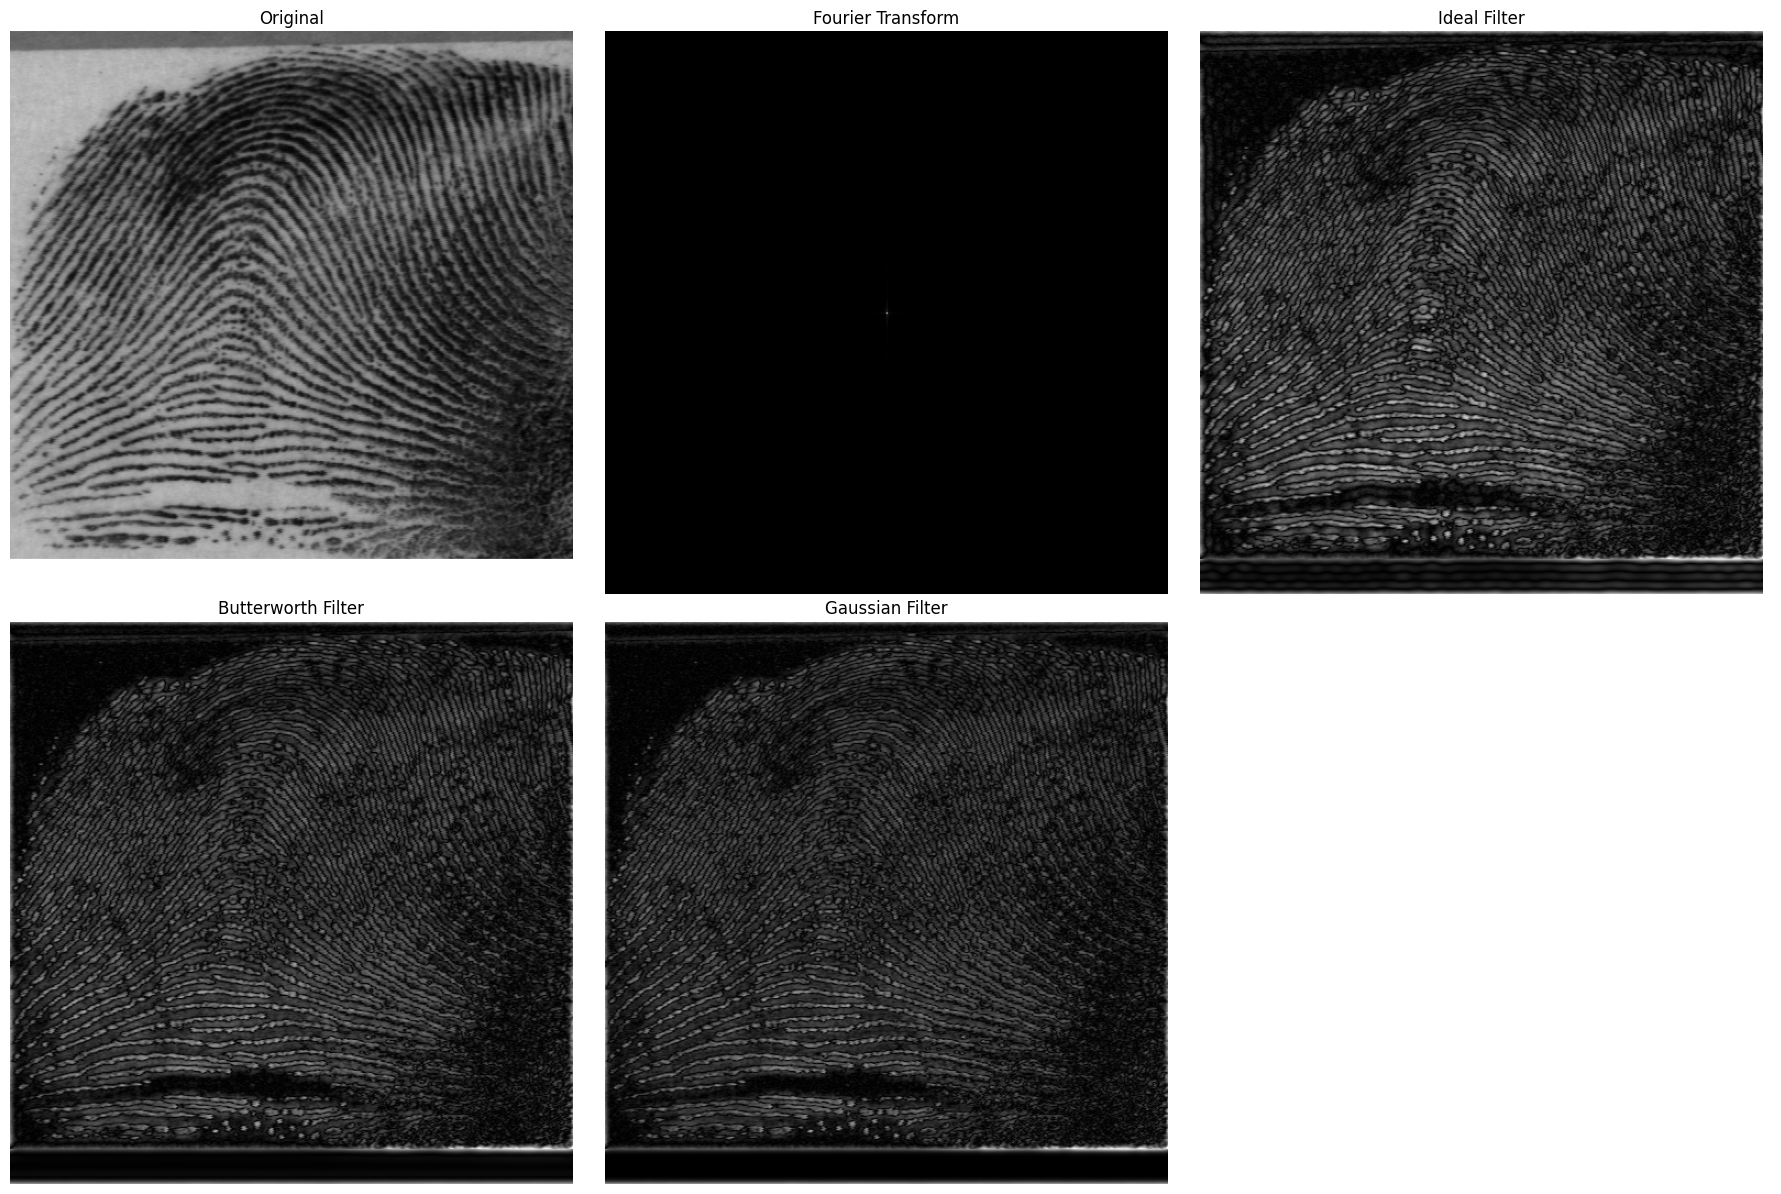

In [22]:
# Load the image
image = fingerprint_image.copy()

# Apply the filters
fourier_high_pass = high_pass_filter(image, filter_type='none')
ideal_filtered = high_pass_filter(image, filter_type='ideal', D0=30)
butterworth_filtered = high_pass_filter(image, filter_type='butterworth', D0=30, n=2)
gaussian_filtered = high_pass_filter(image, filter_type='gaussian', D0=30)


# Display the images
images = [image, fourier_high_pass, ideal_filtered, butterworth_filtered, gaussian_filtered]
labels = ["Original", "Fourier Transform", "Ideal Filter", "Butterworth Filter", "Gaussian Filter"]
plot_images(images, labels, nrows=2, ncols=3, figsize=(18, 12))

### Conclusion

This study highlights the importance of frequency-based image processing and demonstrates how Fourier Transform filtering techniques can be effectively used for image enhancement. 

The choice of filter depends on the specific application needs—whether the goal is to remove noise, enhance features, or sharpen details. These findings are valuable for various fields, including biometrics, medical imaging, and computer vision.

Some of the Findings are:

- Low-pass filters are effective for denoising and smoothing but can lead to loss of details.

- High-pass filters enhance edges and fine structures, making them useful for applications like fingerprint analysis and edge detection.

- Among all filters, Gaussian-based filtering consistently provided the best balance between performance and artifact reduction.

### References


- OpenCV. (n.d.). Fourier Transform. OpenCV Documentation. Retrieved from https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

- Rosebrock, A. (2020, June 15). OpenCV Fast Fourier Transform (FFT) for Blur Detection in Images and Video Streams. PyImageSearch. Retrieved from https://pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

- Dayal, D. (n.d.). Frequency Domain Filtering on an Image using OpenCV. Medium. Retrieved from https://medium.com/@devangdayal/frequency-domain-filtering-on-an-image-using-opencv-26bfcc97e23b

- MathWorks. (n.d.). Fourier Transforms. MATLAB Documentation. Retrieved from https://www.mathworks.com/help/matlab/math/fourier-transforms.html

- Dogra, A., & Bhalla, P. (2014). Image Sharpening By Gaussian And Butterworth High Pass Filter. Biomedical and Pharmacology Journal, 7(2). Retrieved from https://biomedpharmajournal.org/vol7no2/image-sharpening-by-gaussian-and-butterworth-high-pass-filter/

- Diffraction Limited. (n.d.). Low-Pass Filtering. Retrieved from https://cdn.diffractionlimited.com/help/maximdl/Low-Pass_Filtering.htm
